# dataset at https://finance.yahoo.com/quote/TSLA/history?period1=1277818200&period2=1710547848

In [3]:
import pandas as pd
# Pandas is a library that faciliates data analysis and manipulation
df = pd.read_csv('TSLA 3-21-2024.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3451,2024-03-15,163.160004,165.179993,160.759995,163.570007,163.570007,96971900
3452,2024-03-18,170.020004,174.720001,165.899994,173.800003,173.800003,108214400
3453,2024-03-19,172.360001,172.820007,167.419998,171.320007,171.320007,77271400
3454,2024-03-20,173.000000,176.250000,170.820007,175.660004,175.660004,83846700


In [6]:
df = df[['Date', 'Close']]
# only take the date and close columns
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3451,2024-03-15,163.570007
3452,2024-03-18,173.800003
3453,2024-03-19,171.320007
3454,2024-03-20,175.660004


In [7]:
first_date_string = df.iat[3,0]
print(first_date_string)

last_date_string = df.iat[-1,0]
print(last_date_string)

2010-07-02
2024-03-21


In [8]:
import datetime
# convert string into datetime
def str_to_datetime(x):
  split_list = x.split('-')
  year, month, day = int(split_list[0]), int(split_list[1]), int(split_list[2])
  return datetime.datetime(year = year, month = month, day = day)

datetime_obj = str_to_datetime(last_date_string)
datetime_obj += pd.Timedelta(days=1)
day_to_predict = str(datetime_obj).split()[0]
print(day_to_predict)





2024-03-22


In [9]:
df['Date'] = df['Date'].apply(str_to_datetime) # apply the function to each column of df
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3451   2024-03-15
3452   2024-03-18
3453   2024-03-19
3454   2024-03-20
3455   2024-03-21
Name: Date, Length: 3456, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-03-15,163.570007
2024-03-18,173.800003
2024-03-19,171.320007


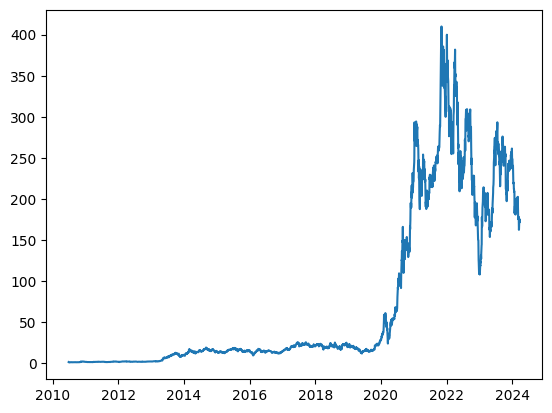

In [11]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])


In [35]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  second_date = str_to_datetime(last_date_str)

  target_date = first_date

  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

window_df = df_to_windowed_df(df, first_date_string, last_date_string, n=3)
window_df




,Target Date,Target-3,Target-2,Target-1,Target
0,2010-07-02,1.592667,1.588667,1.464000,1.280000
1,2010-07-06,1.588667,1.464000,1.280000,1.074000
2,2010-07-07,1.464000,1.280000,1.074000,1.053333
3,2010-07-08,1.280000,1.074000,1.053333,1.164000
4,2010-07-09,1.074000,1.053333,1.164000,1.160000
...,...,...,...,...,...
3448,2024-03-15,177.539993,169.479996,162.500000,163.570007
3449,2024-03-18,169.479996,162.500000,163.570007,173.800003
3450,2024-03-19,162.500000,163.570007,173.800003,171.320007
3451,2024-03-20,163.570007,173.800003,171.320007,175.660004


In [36]:
def windowed_df_date_X_y(windowed_dataframe):
  df_to_np = windowed_dataframe.to_numpy()

  # first column : dates
  dates = df_to_np[:, 0]

  # all the rows and the middle three columns
  middle_matrix = df_to_np[:, 1:-1]

  prediction_matrix = df_to_np[-1, 2:]

  # input matrix X
  # len(dates): number of observations
  # shape[1]: the same number of columns as the windowed_dataframe
  # '1': univariate forcasting (only the closing price is considered)
  X = middle_matrix.reshape(len(dates), middle_matrix.shape[1], 1)
  prediction = prediction_matrix.reshape(1, 3, 1)

  # output vector: all the rows and only the last column
  Y = df_to_np[:, -1]

  return dates, X.astype(np.float32), prediction.astype(np.float32), Y.astype(np.float32)

dates,X,prediction,y = windowed_df_date_X_y(window_df)
dates.shape, X.shape, prediction.shape,y.shape



((3453,), (3453, 3, 1), (1, 3, 1), (3453,))

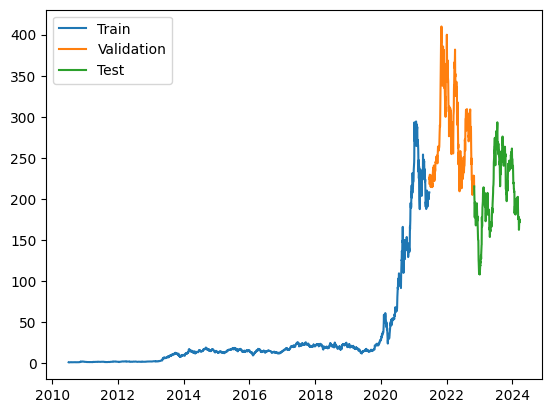

In [37]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

# the first eighty percent of data will be training data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# validation
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# test
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])



In [39]:
from tensorflow.keras.models import Sequential # sequential model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers # built up of many layers

# sequential model, 3: previous three days, 1: univariate forcasting
model = Sequential([layers.Input((3,1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation = 'relu'),
                   layers.Dense(32, activation = 'relu'),
                   layers.Dense(1)])

# loss function = mean square error
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)




Epoch 1/100
87/87 [==============================] - 5s 15ms/step - loss: 3181.5500 - mean_absolute_error: 22.9949 - val_loss: 60557.4844 - val_mean_absolute_error: 240.9383
Epoch 2/100
87/87 [==============================] - 1s 8ms/step - loss: 1053.3304 - mean_absolute_error: 8.7782 - val_loss: 13858.0059 - val_mean_absolute_error: 106.6749
Epoch 3/100
87/87 [==============================] - 1s 8ms/step - loss: 80.9628 - mean_absolute_error: 2.8575 - val_loss: 4231.6323 - val_mean_absolute_error: 48.7607
Epoch 4/100
87/87 [==============================] - 1s 9ms/step - loss: 22.0118 - mean_absolute_error: 1.6621 - val_loss: 2611.5513 - val_mean_absolute_error: 36.2825
Epoch 5/100
87/87 [==============================] - 1s 9ms/step - loss: 14.2598 - mean_absolute_error: 1.4845 - val_loss: 1968.5547 - val_mean_absolute_error: 30.3616
Epoch 6/100
87/87 [==============================] - 1s 8ms/step - loss: 15.7119 - mean_absolute_error: 1.6031 - val_loss: 2413.1680 - val_mean_absolu

87/87 [==============================] - 0s 4ms/step


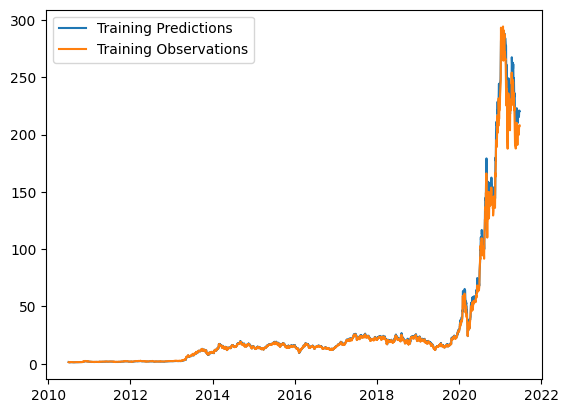

In [30]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

11/11 [==============================] - 0s 2ms/step


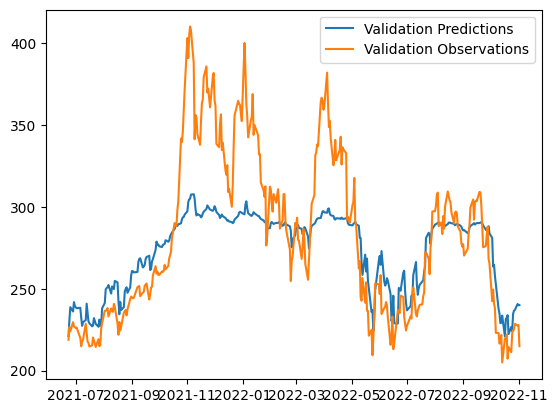

In [31]:
validation_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, validation_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


11/11 [==============================] - 0s 4ms/step


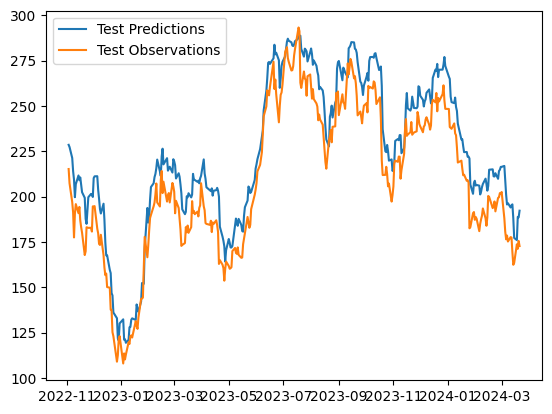

In [32]:

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

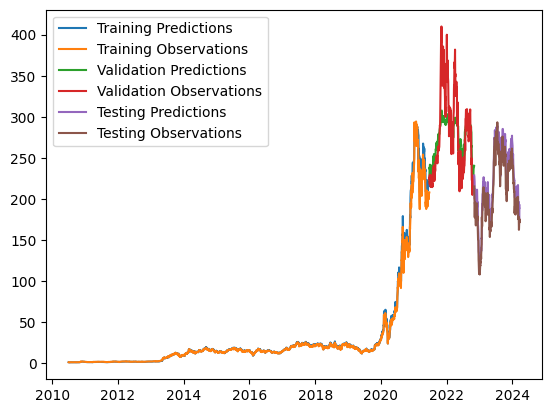

In [33]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, validation_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [40]:
test_predictions = model.predict(prediction).flatten()
str_to_print = "Prediction for " + day_to_predict + ": " + str(test_predictions);
print(str_to_print)

1/1 [==============================] - 1s 531ms/step
Prediction for 2024-03-22: [173.21164]
